|||
|-|-|
|**Name**|De Guzman, Aero Kent D.|
|**Course Code**|CPE313|
|**Course Section**|CPE32S3|
|**Course Title**|Advanced Machine Learning and Deep Learning|
|**Date Performed**|15/01/26|
|**Date Submitted**|15/01/26|
|**Instructor**|Engr. Neil Barton James Matira|

# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [38]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [40]:
x_train[0].shape

(28, 28)

Check the sample train data

In [41]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [42]:
y_train[333]

np.uint8(8)

Check the actual image

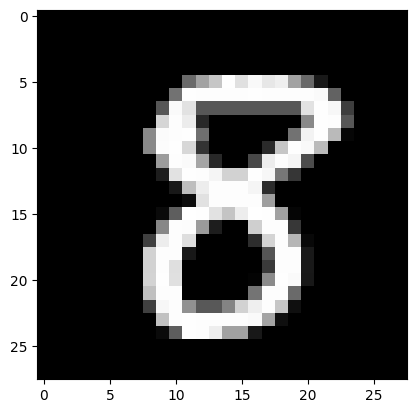

In [43]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [44]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [45]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

Convert class vectors to binary class matrices

In [46]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [47]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [49]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7536 - loss: 0.8015 - val_accuracy: 0.9417 - val_loss: 0.1962
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9246 - loss: 0.2591 - val_accuracy: 0.9559 - val_loss: 0.1482
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9408 - loss: 0.2030 - val_accuracy: 0.9643 - val_loss: 0.1192
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9502 - loss: 0.1689 - val_accuracy: 0.9695 - val_loss: 0.1035
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9554 - loss: 0.1495 - val_accuracy: 0.9698 - val_loss: 0.1026
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9600 - loss: 0.1384 - val_accuracy: 0.9729 - val_loss: 0.0915
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9605 - loss: 0.1295 - val_accuracy: 0.9729 - val_loss: 0.0915
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9623 - loss: 0.1234 - val_accuracy: 0.

Use Keras evaluate function to evaluate performance on the test set

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09321384131908417
Test accuracy: 0.9776999950408936


Interpret the result

# **In here the model above used a model with an activation of relu as well SoftMax for the output while it has a learning rate of 0.001 using an optimizer of RMSprop as well as a dropout rate of 0.2 And from all of those when it comes to evaludating now the performace of the model is that it returned a totaltest accuracy score of around 0.97 and test loss of around 0.09 meaning that not only is the performance of the model great with the provided parameters already but is also can be seen to also have less of an overfitting with it since the validation for the model is greater as well.**

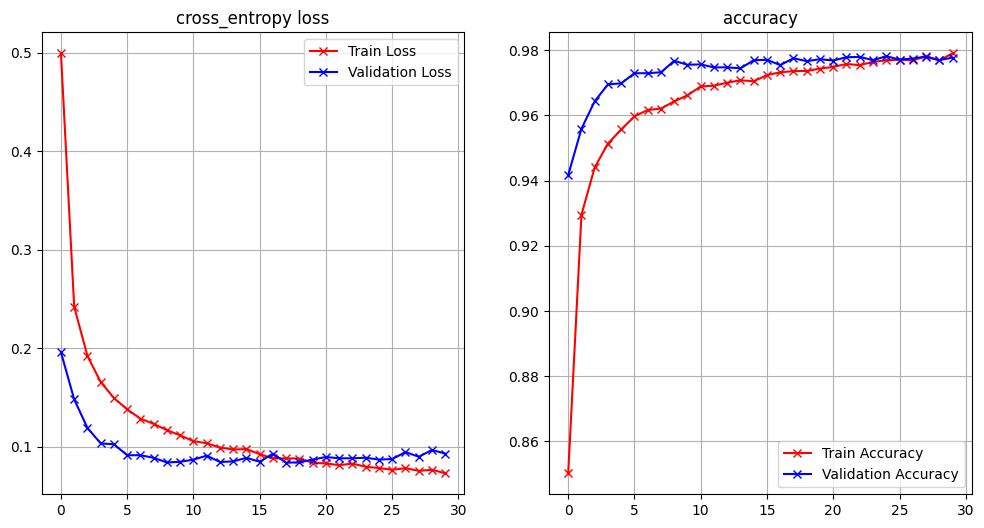

In [51]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

# **Based on the results for both accuracy and loss on train and validation, it further supports on the interpretation earlier on that the model is performing great already with the provided parameters since it has great values returning in training and validation that it is not overfitting. Additionally from the graph above is that the training is slowly increasing in accuracy and lessening in loss as the epoch increases but the validation part seems to be increasing along it still meaning that there could be another assumption to be made that further increasing the epochs could increase the performance but it can also be seen in the validation graph that the loss is worsening a bit as the epoch increases.**

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [23]:
# Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Two hidden layers.
# First hidden layer of size 400 and second of size 300
# Dropout of .4 at each layer

model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,310 (1.67 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

**How many parameters does your model have? How does it compare with the previous model?**

**[Model]**\
Total params: 55,050 (215.04 KB)\
Trainable params: 55,050 (215.04 KB)\
Non-trainable params: 0 (0.00 B)

**[Model_1]**\
Total params: 437,310 (1.67 MB)\
Trainable params: 437,310 (1.67 MB)\
Non-trainable params: 0 (0.00 B)


In here it can be seen here that model 1 has thousands parameters more parameters compared to the previous model. This means that when it is compared to the previous model then it will train much longer because of the amount of parameter it has.

In [25]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
model_1.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=0.001),
                metrics=['accuracy'])
batch_size = 128
epochs = 20
history_1 = model_1.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=2,
                        validation_data=(x_test, y_test))

Epoch 1/20
469/469 - 6s - 13ms/step - accuracy: 0.8983 - loss: 0.3354 - val_accuracy: 0.9619 - val_loss: 0.1257
Epoch 2/20
469/469 - 6s - 13ms/step - accuracy: 0.9538 - loss: 0.1523 - val_accuracy: 0.9684 - val_loss: 0.1025
Epoch 3/20
469/469 - 1s - 3ms/step - accuracy: 0.9647 - loss: 0.1188 - val_accuracy: 0.9744 - val_loss: 0.0844
Epoch 4/20
469/469 - 2s - 4ms/step - accuracy: 0.9711 - loss: 0.0997 - val_accuracy: 0.9781 - val_loss: 0.0737
Epoch 5/20
469/469 - 3s - 6ms/step - accuracy: 0.9736 - loss: 0.0876 - val_accuracy: 0.9789 - val_loss: 0.0721
Epoch 6/20
469/469 - 1s - 3ms/step - accuracy: 0.9756 - loss: 0.0800 - val_accuracy: 0.9775 - val_loss: 0.0768
Epoch 7/20
469/469 - 1s - 3ms/step - accuracy: 0.9778 - loss: 0.0734 - val_accuracy: 0.9803 - val_loss: 0.0681
Epoch 8/20
469/469 - 1s - 3ms/step - accuracy: 0.9799 - loss: 0.0658 - val_accuracy: 0.9817 - val_loss: 0.0685
Epoch 9/20
469/469 - 1s - 3ms/step - accuracy: 0.9814 - loss: 0.0644 - val_accuracy: 0.9817 - val_loss: 0.0682

Test loss: 0.07995307445526123
Test accuracy: 0.9829999804496765


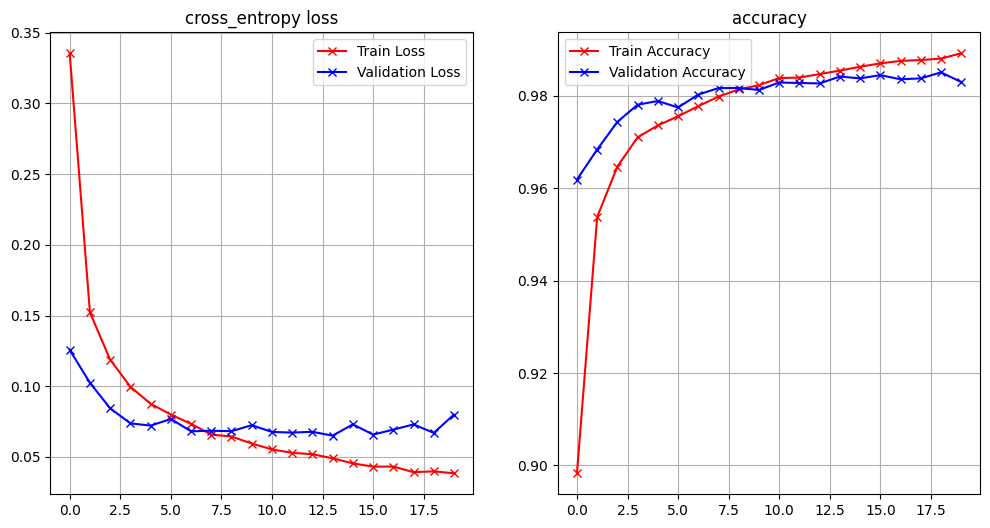

In [29]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])
plot_loss_accuracy(history_1)

In [62]:
# Use at least two regularization techniques and apply it to the new model (model_2)
from keras import regularizers # https://keras.io/api/layers/regularizers/#:~:text=from,1e%2D5%29%20%29

model_2 = Sequential()
model_2.add(Dense(128,
                  activation='relu',
                  input_shape=(784,),
                  kernel_regularizer=regularizers.L1L2(l1=1e-8, l2=1e-6),
                  bias_regularizer=regularizers.L2(1e-6),
                  activity_regularizer=regularizers.L2(1e-6)
                  ),
            )
model_2.add(Dropout(0.2))
model_2.add(Dense(64,
                  activation='relu',
                  kernel_regularizer=regularizers.L1L2(l1=1e-8, l2=1e-6),
                  bias_regularizer=regularizers.L2(1e-6),
                  activity_regularizer=regularizers.L2(1e-6),
                  )
            )
model_2.add(Dropout(0.2))
model_2.add(Dense(10, activation='softmax'))
model_2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Train this model for your preferred epochs, learning rate, batch size and optimizer
model_2.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=0.001),
                metrics=['accuracy'])
batch_size = 128
epochs = 30
history_2 = model_2.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7874 - loss: 0.7127 - val_accuracy: 0.9511 - val_loss: 0.1742
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9390 - loss: 0.2166 - val_accuracy: 0.9651 - val_loss: 0.1260
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9568 - loss: 0.1558 - val_accuracy: 0.9695 - val_loss: 0.1150
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9647 - loss: 0.1341 - val_accuracy: 0.9736 - val_loss: 0.1016
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9678 - loss: 0.1166 - val_accuracy: 0.9755 - val_loss: 0.0968
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.0983 - val_accuracy: 0.9764 - val_loss: 0.0906
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.0936 - val_accuracy: 0.9774 - val_loss: 0.0966
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9792 - loss: 0.0849 - val_accuracy: 0

Test loss: 0.08908026665449142
Test accuracy: 0.9807999730110168


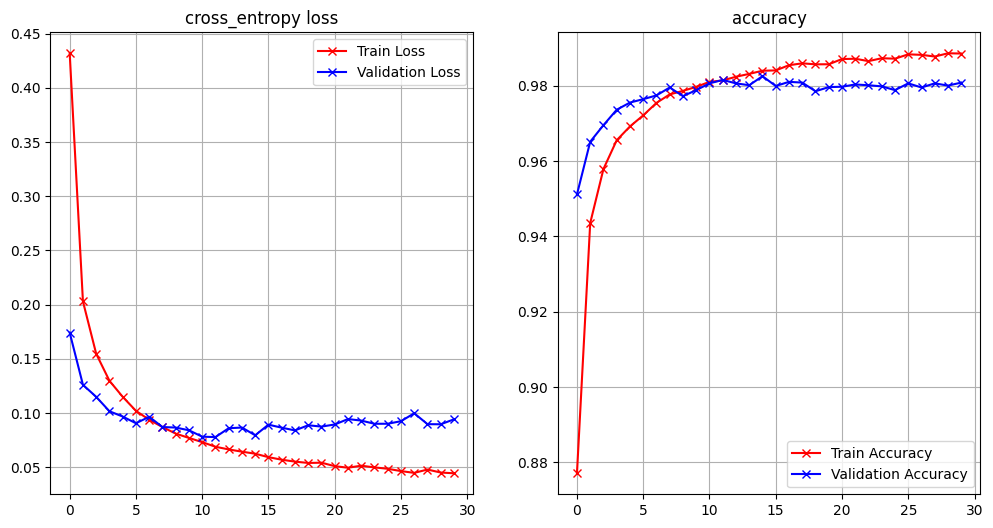

In [64]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])
plot_loss_accuracy(history_2)

GRAPH FOR MODEL 0
GRAPH FOR MODEL 1


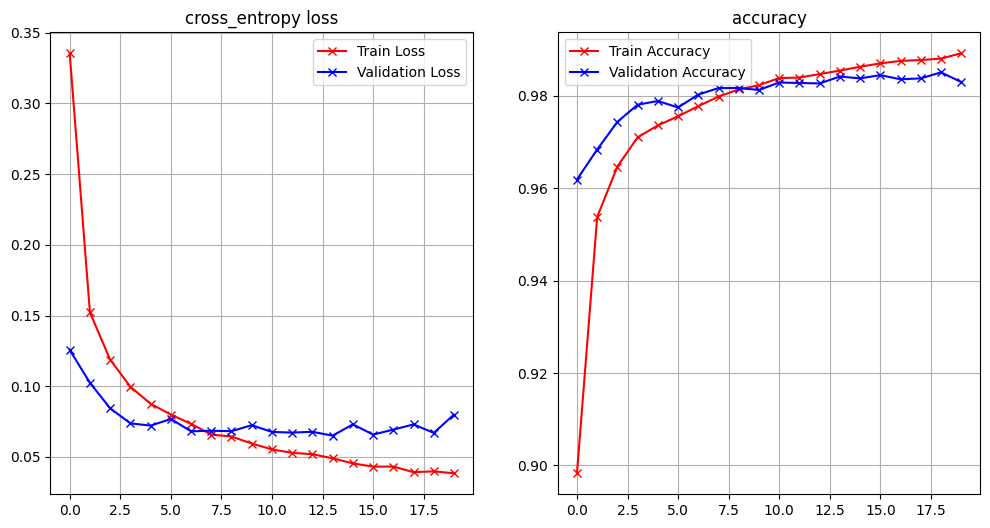

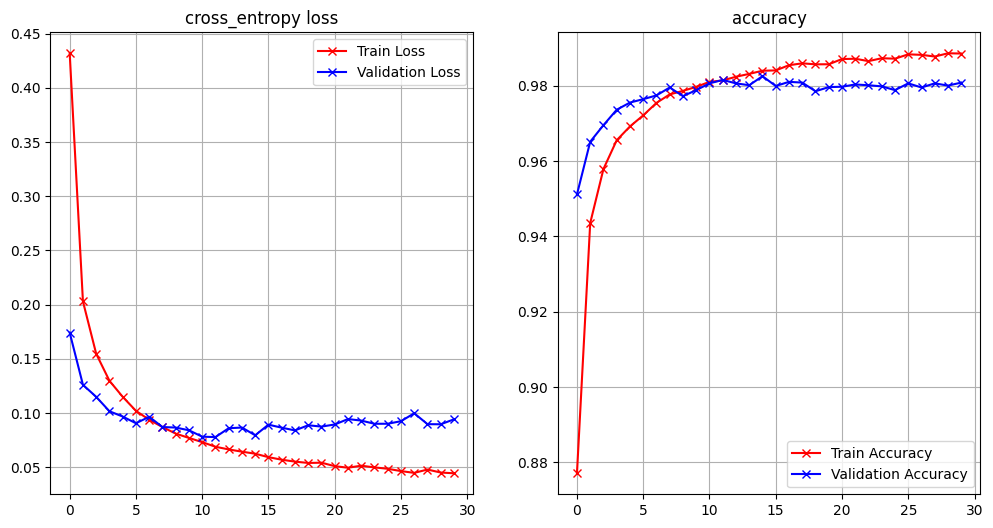

In [66]:
graphs = [history_1, history_2]

for i in range(2):
  print(f'GRAPH FOR MODEL {i}')
  plot_loss_accuracy(graphs[i])

**Compare the accuracy and loss (training and validation) of model_1 and model_2**

Looking at the graph above it can be seen here that the two performed similarly and returned performance that only has slight differences when looking at the graph alone. When it comes to the loss part it can be seen that the model 2 perfomed a little bit smoother compared to model_1 though the model_1 returned a better loss value. The accuracy on the other hand is that model_1 has a more closer results in the graph as compared to the model_2 with the accuracy graph having a more noticable gap in between them as well as the model_1 having a little bit more better accuracy. All in all the two performed similarly but the model_1 performed little bit better.

# **Conclusion**

## **To conclude the following laboratory activity it was all about regularization techniques when it comes to training deep learning models now. In here a sequential model is used in building the model and when building the model during the procedures there is another addition which is the dropout() which is a regularization technique that prevents overfitting since how it works based on the lesson is that some neurons based on the percent amount configured (which is 0.4 in this case) would be turned off occasionally during training so that the model will have a harder time learning a overfitting pattern. All of them along with the supplementary was evaluated using evaluate() which evaluates them afterwards. Another regularization technique which was not asked that is used under the supplementary is the regularization function from keras which is used in the parameters of kernel_, bias_, and activity_regularizer under the dense() function in order to meet the minimum requirement of 2 regularization techniques in the supplementary.**

# **Supplementary 2 (optional but for additional points when accomplished)**

achieve 60% accuracy on the ... dataset

In [55]:
from keras.datasets import cifar10

In [56]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [57]:
x_train = x_train.reshape(len(x_train), 32*32*3)
x_test = x_test.reshape(len(x_test), 32*32*3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [58]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [59]:
x_train[0].shape

(3072,)

In [67]:
from keras import regularizers

model_cifar = Sequential()
model_cifar.add(Dense(896,
                  activation='relu',
                  input_shape=(3072,),
                  kernel_regularizer=regularizers.L1L2(l1=1e-8, l2=1e-6),
                  bias_regularizer=regularizers.L2(1e-6),
                  activity_regularizer=regularizers.L2(1e-6)
                  ),
            )
model_cifar.add(Dropout(0.2))
model_cifar.add(Dense(896,
                  activation='relu',
                  kernel_regularizer=regularizers.L1L2(l1=1e-8, l2=1e-6),
                  bias_regularizer=regularizers.L2(1e-6),
                  activity_regularizer=regularizers.L2(1e-6),
                  )
            )
model_cifar.add(Dropout(0.2))
model_cifar.add(Dense(10, activation='softmax'))
model_cifar.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 896)            │     2,753,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 896)            │       803,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         8,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,566,090 (13.60 MB)

 Trainable params: 3,566,090 (13.60 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# Train this model for your preferred epochs, learning rate, batch size and optimizer
model_cifar.compile(loss='categorical_crossentropy',
                    optimizer=RMSprop(learning_rate=0.001),
                    metrics=['accuracy'])
batch_size = 128
epochs = 180
history_cifar = model_cifar.fit(x_train, y_train,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(x_test, y_test))

Epoch 1/180
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2039 - loss: 2.6977 - val_accuracy: 0.3264 - val_loss: 1.8692
Epoch 2/180
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3194 - loss: 1.8979 - val_accuracy: 0.3928 - val_loss: 1.7371
Epoch 3/180
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3506 - loss: 1.8147 - val_accuracy: 0.3939 - val_loss: 1.7363
Epoch 4/180
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3744 - loss: 1.7562 - val_accuracy: 0.4290 - val_loss: 1.6374
Epoch 5/180
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3830 - loss: 1.7301 - val_accuracy: 0.4432 - val_loss: 1.6088
Epoch 6/180
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3990 - loss: 1.6990 - val_accuracy: 0.4294 - val_loss: 1.6273
Epoch 7/180
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4060 - loss: 1.6776 - val_accuracy: 0.3985 - val_loss: 1.7106
Epoch 8/180
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4126 - loss: 1.6645 - val_ac

Test loss: 1.791551947593689
Test accuracy: 0.48739999532699585


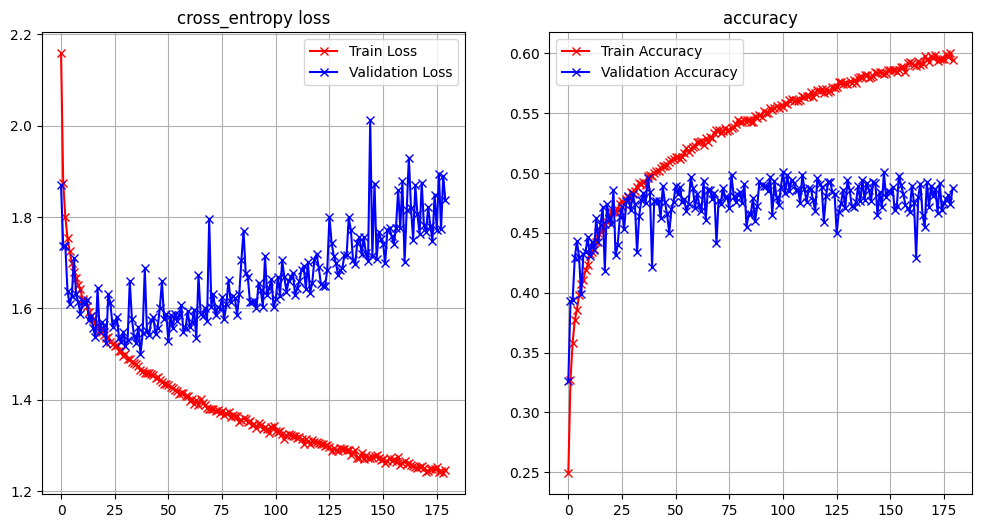

In [69]:
score_cifar = model_cifar.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_cifar[0])
print('Test accuracy:', score_cifar[1])
plot_loss_accuracy(history_cifar)

**interpretation**

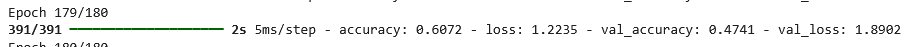

To conclude the following supplementary activity 2 for this hands-on, the same learnings was used in both the creation and training of the model but this time a different dataset was used now which is the cifar10 dataset. The dataset contains various category of differing labels such as a picture of a truck or a dog. The model was cleaned and prepared for training and when it comes to the output now it can be seen that the model is heavily overly fitting as can be seen in the graph such that while it has indeed reached the accuracy of 0.60 on some cases the best output was around 0.4 only and looking at the graph, only around 25 epochs is actually useful only compared to the other that is overfitting.